In [116]:
#Personal Expense Tracker
# Introduction- A Python project to track daily expenses with category-wise analysis and visualizations.
#MySQL Database Setup- Create the database `expense_tracker` and table `expenses` with columns: id, amount, category, expense_date.
    
import pymysql

#Connect Python to MySQL- Using PyMySQL to connect and create a cursor for executing SQL queries. 

#Connect to MySQL
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="your_password",   # your password here
    database="expense_tracker"
)

# Create a cursor
cursor = conn.cursor()

#Add Expense -Function to insert a new expense into the database.

# Function to add expense
def add_expense(amount, category, date):
    query = "INSERT INTO expenses (amount, category, expense_date) VALUES (%s, %s, %s)"
    cursor.execute(query, (amount, category, date))
    conn.commit()
    print("Expense added!")

In [117]:
add_expense(500, "Food", "2026-02-22")
add_expense(200, "Transport", "2026-02-22")

Expense added!
Expense added!


In [118]:
# View All Expenses- Function to fetch and display all expenses.
cursor.execute("SELECT * FROM expenses")
cursor.fetchall()

((1, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22)),
 (2, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22)),
 (3, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22)),
 (4, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22)),
 (5, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22)),
 (6, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22)),
 (7, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22)),
 (8, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22)),
 (9, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22)),
 (10, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22)))

In [119]:
#View All Expenses- Function to fetch and display all expenses.
def view_expenses():
    cursor.execute("SELECT * FROM expenses")
    records = cursor.fetchall()
    
    print("All Expenses:")
    for row in records:
        print(row)

In [120]:
view_expenses()

All Expenses:
(1, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22))
(2, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22))
(3, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22))
(4, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22))
(5, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22))
(6, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22))
(7, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22))
(8, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22))
(9, Decimal('500.00'), 'Food', datetime.date(2026, 2, 22))
(10, Decimal('200.00'), 'Transport', datetime.date(2026, 2, 22))


In [121]:

    cursor.execute("SELECT SUM(amount) FROM expenses")
    total = cursor.fetchone()[0]
    print(f"Total Spending: {total}")

Total Spending: 3500.00


In [122]:
total_spending()

Total Spending: 3500.00


In [123]:

    cursor.execute("SELECT category, SUM(amount) FROM expenses GROUP BY category")
    records = cursor.fetchall()
    
    print("Category-wise Spending:")
    for row in records:
        print(f"{row[0]} : {row[1]}")

Category-wise Spending:
Food : 2500.00
Transport : 1000.00


In [124]:
category_wise_spending()

Category-wise Spending:
Food : 2500.00
Transport : 1000.00


In [125]:
while True:
    print("\n1. Add Expense")
    print("2. View All Expenses")
    print("3. Total Spending")
    print("4. Category-wise Spending")
    print("5. Exit")
    
    choice = input("Enter choice: ")
    
    if choice == "1":
        amt = float(input("Amount: "))
        cat = input("Category: ")
        date = input("Date (YYYY-MM-DD): ")
        add_expense(amt, cat, date)
    elif choice == "2":
        view_expenses()
    elif choice == "3":
        total_spending()
    elif choice == "4":
        category_wise_spending()
    elif choice == "5":
        print("Goodbye!")
        break
    else:
        print("Invalid choice")


1. Add Expense
2. View All Expenses
3. Total Spending
4. Category-wise Spending
5. Exit


Enter choice:  5


Goodbye!


In [126]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [127]:
import matplotlib.pyplot as plt
# Category-wise Pie Chart- Visual representation of spending percentages per category.
def category_pie_chart():
    # Get category-wise totals
    cursor.execute("SELECT category, SUM(amount) FROM expenses GROUP BY category")
    records = cursor.fetchall()
    
    if not records:
        print("No expenses found!")
        return
    
    categories = [row[0] for row in records]
    amounts = [row[1] for row in records]
    
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=140)
    plt.title("Spending by Category")
    plt.show()

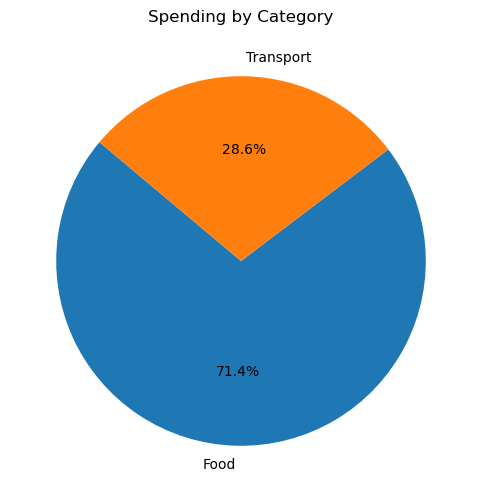

In [128]:
category_pie_chart()

In [129]:
# Category-wise Bar Chart- Visual representation of spending amounts per category.
def category_bar_chart():
    cursor.execute("SELECT category, SUM(amount) FROM expenses GROUP BY category")
    records = cursor.fetchall()
    
    if not records:
        print("No expenses found!")
        return
    
    categories = [row[0] for row in records]
    amounts = [row[1] for row in records]
    
    plt.figure(figsize=(8,5))
    plt.bar(categories, amounts, color='skyblue')
    plt.title("Spending by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.show()


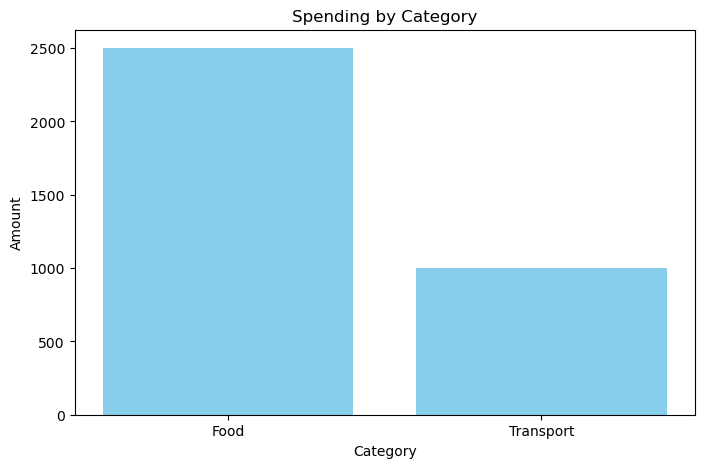

In [130]:
category_bar_chart()

In [131]:
while True:
    print("\n1. Add Expense")
    print("2. View All Expenses")
    print("3. Total Spending")
    print("4. Category-wise Spending")
    print("5. Category Pie Chart")
    print("6. Category Bar Chart")
    print("7. Exit")
    
    choice = input("Enter choice: ")
    
    if choice == "1":
        amt = float(input("Amount: "))
        cat = input("Category: ")
        date = input("Date (YYYY-MM-DD): ")
        add_expense(amt, cat, date)
    elif choice == "2":
        view_expenses()
    elif choice == "3":
        total_spending()
    elif choice == "4":
        category_wise_spending()
    elif choice == "5":
        category_pie_chart()
    elif choice == "6":
        category_bar_chart()
    elif choice == "7":
        print("Goodbye!")
        break
    else:
        print("Invalid choice")


1. Add Expense
2. View All Expenses
3. Total Spending
4. Category-wise Spending
5. Category Pie Chart
6. Category Bar Chart
7. Exit


Enter choice:  7


Goodbye!
